### DNN_HW2

**Q6. Fashion mnist data bonus question**

followed the link: https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb

**Comments for all the sub ques in notebook: You can vary the lr for the optimizer, patience in early stopping, no. of epochs, batch_size and check for the accuracy and performance.**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import BatchNormalization, AlphaDropout
from keras.callbacks import EarlyStopping

In [2]:
#load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#check the input data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)


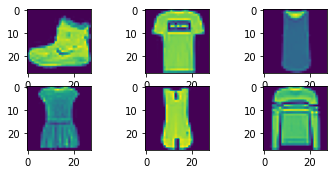

In [5]:
#plot sample train images
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(331 + i)
    ax.imshow(X_train[i])
    
plt.show()

In [6]:
#convert to gray scale by normalizing the data to range [0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

#include the gray scale channel in input shape
input_shape = (28,28,1)

#define the number of target classes
tar_class = 10

#one hot encode the target class
y_train = to_categorical(y_train, tar_class)
y_test = to_categorical(y_test, tar_class)

In [7]:
#check the shape train and test data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000, 10)


In [8]:
#define parameters for the model
#input_dim = X_train.shape[1]
epochs = 50
validation_split = 0.1 

a. Build a DNN with 10 hidden layers of 30 neurons each. Use He initialization (see Géron A. Hands-on textbook p. 333) and the ELU activation function. Using Nadam optimization and early stopping(see https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/), train the network on this fashion MNIST dataset.

**Comments:**
1. There are two He initialization in keras. I have used He normal as the code example prof showed in class also used he_normal.


In [9]:
#set seed to reproduce results
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#define model parameters
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose=1, patience = 5)
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.HeNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(30, activation = "elu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                9

In [10]:
#train the model 
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8110 - accuracy: 0.7146 - val_loss: 0.5348 - val_accuracy: 0.8062
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4971 - accuracy: 0.8207 - val_loss: 0.4533 - val_accuracy: 0.8328
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4401 - accuracy: 0.8410 - val_loss: 0.4204 - val_accuracy: 0.8438
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4076 - accuracy: 0.8527 - val_loss: 0.4183 - val_accuracy: 0.8443
Epoch 5/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3869 - accuracy: 0.8602 - val_loss: 0.3897 - val_accuracy: 0.8532
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3696 - accuracy: 0.8666 - val_loss: 0.3836 - val_accuracy: 0.8577
Epoch 7/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3577 - accuracy: 0.8704 - val_loss: 0.3730 - val_accuracy:

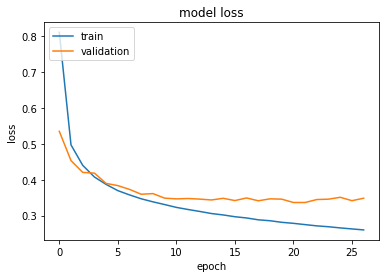

In [11]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
#evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8697
Test loss: 0.3739
Test accuracy: 86.97%


**This model has an accuracy of 86% and was trained for 27 epochs with training time of 4-5s for each epoch.**

b. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [13]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#model parameters
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.HeNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(30, activation = "elu",kernel_initializer = initializer))
    model.add(BatchNormalization())
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                1

In [14]:
#train the model 
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 9s 5ms/step - loss: 1.0431 - accuracy: 0.6645 - val_loss: 0.5852 - val_accuracy: 0.8052
Epoch 2/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.6346 - accuracy: 0.7867 - val_loss: 0.4891 - val_accuracy: 0.8300
Epoch 3/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5507 - accuracy: 0.8127 - val_loss: 0.4397 - val_accuracy: 0.8450
Epoch 4/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5100 - accuracy: 0.8238 - val_loss: 0.4102 - val_accuracy: 0.8563
Epoch 5/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4833 - accuracy: 0.8316 - val_loss: 0.4020 - val_accuracy: 0.8593
Epoch 6/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4650 - accuracy: 0.8385 - val_loss: 0.3913 - val_accuracy: 0.8627
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4506 - accuracy: 0.8425 - val_loss: 0.3798 - val_accuracy:

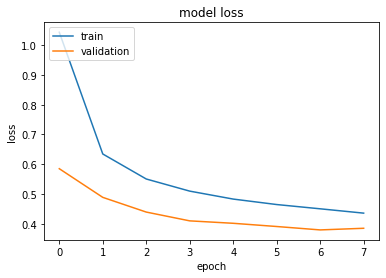

In [15]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
#evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8530
Test loss: 0.4121
Test accuracy: 85.30%


Is it converging faster than before? Yes, the model took only 8 epochs as compared to the previous model which took 27 epochs. The model is three times more faster compared to original model.

Does it produce a better model? **Ideally the answer should be yes, accuracy better than the original model. I tried with different lr, batch_size, no. of epochs, patience in early stoping. But could not get accuracy more than the original model. Some trials gave a bad learning curve and had to revert back the values.**

How does it affect training speed? The training speed is more for each epoch as compared to original model. This is because of the addition of Batch Normalization layers which results in extra computation time.

c. Try replacing Batch Normalization with SELU and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features).

In [17]:
#standardize the input features by subtracting with mean and dividing with SD
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [18]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(30, activation = "selu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                9

In [19]:
#train the model 
history = model.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 1.1856 - accuracy: 0.6352 - val_loss: 0.6799 - val_accuracy: 0.7648
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5907 - accuracy: 0.7927 - val_loss: 0.5332 - val_accuracy: 0.8152
Epoch 3/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8266 - val_loss: 0.4790 - val_accuracy: 0.8278
Epoch 4/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4378 - accuracy: 0.8429 - val_loss: 0.4502 - val_accuracy: 0.8413
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4064 - accuracy: 0.8543 - val_loss: 0.4262 - val_accuracy: 0.8493
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3815 - accuracy: 0.8624 - val_loss: 0.4108 - val_accuracy: 0.8558
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8687 - val_loss: 0.4000 - val_accuracy:

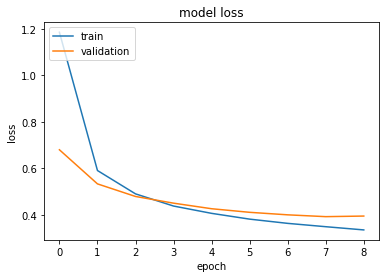

In [20]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8488
Test loss: 0.4347
Test accuracy: 84.88%


**The model accuracy and training time for each epoch is less compared to the BN model. Both BN and this model took about 8-9 epochs for training on the data.**

d. Try regularizing the model with some dropout and compare model performance.

In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#define the model layers
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
  model.add(Dense(30, activation = "selu",kernel_initializer = initializer))
  model.add(AlphaDropout(0.1))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = "nadam",
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 30)                0

In [23]:
#train the model 
history = model.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 6s 3ms/step - loss: 1.5997 - accuracy: 0.4953 - val_loss: 0.6464 - val_accuracy: 0.7755
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7710 - accuracy: 0.7281 - val_loss: 0.5568 - val_accuracy: 0.8028
Epoch 3/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6660 - accuracy: 0.7728 - val_loss: 0.5232 - val_accuracy: 0.8253
Epoch 4/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6108 - accuracy: 0.7974 - val_loss: 0.4851 - val_accuracy: 0.8378
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5704 - accuracy: 0.8159 - val_loss: 0.4825 - val_accuracy: 0.8400
Epoch 6/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5464 - accuracy: 0.8254 - val_loss: 0.4423 - val_accuracy: 0.8525
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5141 - accuracy: 0.8335 - val_loss: 0.4457 - val_accuracy:

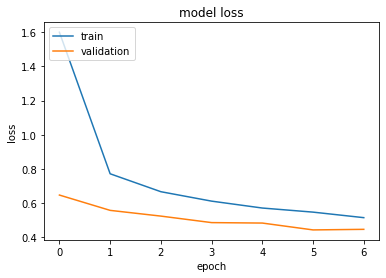

In [24]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8418
Test loss: 0.4680
Test accuracy: 84.18%


**The model accuracy is 84% with dropout which is less than the original and the BN model.**

e. Retrain your model using some learning rate scheduling, e.g., 1cycle scheduling, and to compare whether it improves training speed and model accuracy.

In [26]:
#one cycle scheduler class
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [36]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(30, activation = "selu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = "nadam",
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                9

In [37]:
#train the model 
n_epochs = 30
batch_size = 128
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate = 0.001)
history = model.fit(X_train_scaled, y_train,
                    epochs = n_epochs,
                    verbose = True,
                    shuffle = True,
                    batch_size = batch_size,
                    validation_split = validation_split,
                    callbacks = [onecycle])

Epoch 1/30
422/422 [==============================] - 2s 5ms/step - loss: 1.6819 - accuracy: 0.5298 - val_loss: 0.8664 - val_accuracy: 0.7015
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.7088 - accuracy: 0.7539 - val_loss: 0.6115 - val_accuracy: 0.7880
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5495 - accuracy: 0.8074 - val_loss: 0.5305 - val_accuracy: 0.8125
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4747 - accuracy: 0.8325 - val_loss: 0.4727 - val_accuracy: 0.8287
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4275 - accuracy: 0.8476 - val_loss: 0.4407 - val_accuracy: 0.8427
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.3976 - accuracy: 0.8579 - val_loss: 0.4198 - val_accuracy: 0.8507
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.3732 - accuracy: 0.8646 - val_loss: 0.3956 - val_accuracy: 0.8555
Epoch 

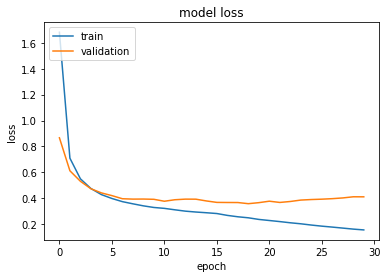

In [38]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8722
Test loss: 0.4390
Test accuracy: 87.22%


**The model training time is 2s/epoch and accuracy is 87% which is better compared to all the other models.**

**Tried with early stoping as well, the model curve seems to be good, but the accuracy is less than the original model. And also the example code link and few sites in google as well did not use ES with lr scheduling, hence I removed it. You can try running with and without once on ur system.**